<a href="https://colab.research.google.com/github/drusho/eda_reddit_politics/blob/main/notebooks/2021_07_05_reddit_politics_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of Reddit's /r/Politics
> Data Analaysis, API, NLP, Visualizations

- toc: false
- badges: false
- comments: true
- categories: [NLP, Pandas, Plotly, Texthero, Prawn, Reddit, API]
- image: "images/thumbnails/reddit_politics.jpg"

<br>

Notebook Created by __[David Rusho](https://github.com/drusho)__

* Notebook's [Github](https://github.com/drusho/eda_reddit_politics)

* Other Social Media Links:

   [Twitter](https://twitter.com/drusho)  |  [Github](https://github.com/drusho)  |  [Linkedin](https://linkedin.com/in/davidrusho)  |  [Tableau](https://public.tableau.com/app/profile/drusho)  

<br>

##Introduction
---

### About the Data

<img src="https://raw.githubusercontent.com/drusho/eda_reddit_politics/main/assets/reddit_logo.png"  width="300"/>


####__What is Reddit?__

Reddit is an American social news aggregation, web content rating, and discussion website. Registered members submit content to the site such as links, text posts, images, and videos, which are then voted up or down by other members. 

<br>
<br>

<img src="https://raw.githubusercontent.com/drusho/eda_reddit_politics/main/assets/reddit_politics.jpg" width="300"/>


####__Subreddit__

Posts are organized by subject into user-created boards called "communities" or "subreddits", which cover a variety of topics such as news, politics, religion, science, movies, video games, music, books, sports, fitness, cooking, pets, and image-sharing. 

<br>
<br>


####__<img src="https://raw.githubusercontent.com/drusho/eda_reddit_politics/main/assets/upvote_downvote.png" height="60"/> Upvoting and Downvoting__

Submissions with more up-votes appear towards the top of their subreddit and, if they receive enough up-votes, ultimately on the site's front page

<br>
<br>



<img src="https://raw.githubusercontent.com/drusho/eda_reddit_politics/main/assets/subreddit_tabs.png" width="300"/>

####__Subreddit Tabs__

At the top of each page on Reddit, you will see a selection of tabs marked Hot, New, Rising, Controversial, Top, Gilded, and Wiki. 

Hot posts are the posts that have been getting the most upvotes and comments recently on that subreddit. This is the tab that will be used for this notebook.


###Project Goals

This notebook will focus on 'Hot' subreddit tab posts due to their focus on upvotes and recent comments.  Data from /r/politics will be scrapped using python library _Praw_.  Analysis will include determining top posts for this subreddit and understanding what factors contributed to their ranking beyond most upvotes and comments.  Such as the correlation between comments and points, word frequency and semantic analysis of post titles


###Summary of Results

####__Correlation of Post Score and Number of Comments__

<img src="https://raw.githubusercontent.com/drusho/eda_reddit_politics/main/reports/figures/Correlation%20of%20Dataframe%20(Heatmap).png" width="500"/>

A heatmap that was ran through Seaborn showed there was a very positive correlation between the number of comments and the score of a posts (0.89).

<br>
<br>

####__Word Frequency of Post Titles__

<img src="https://raw.githubusercontent.com/drusho/eda_reddit_politics/main/reports/figures/Word%20Frequency%20of%20Post%20Titles%20(Wordcloud).png" width="500"/>

Word frequency showed that _Biden_ and _Trump_ were the most popular key words, followed by _GOP_.

<br>
<br>

####__Sentiment Analysis__
<img src="https://raw.githubusercontent.com/drusho/eda_reddit_politics/main/reports/figures/Sentiment%20of%20Post%20Titles%20(Histogram%20Plot).png" width="500">

The majority of posts in /r/politics were found be _neutral_, followed by _negative_.


##Data Collection and Cleaning
---

### Import Libraries

In [ ]:
#collapse
!pip install praw
!pip install vaderSentiment
!pip install texthero

In [ ]:
#collapse
from configparser import ConfigParser 
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import praw
import seaborn as sns
import texthero as herofrom 
from texthero import preprocessing
from texthero import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

### Praw (Reddit API) Setup

In [ ]:
#hide
cid = 't4MWafN7valKRA'
csec = '_nmp3CGP9gSviRzk7r8L0rU2uFLXLA'
ua = 'testing-scrape'
username = ''  # reddit username
password = '' # reddit password

In [ ]:
#collapse
# praw setup
reddit = praw.Reddit(client_id = cid, #peronal use script
                    client_secret = csec, #secret token
                    usernme = username, #profile username
                    password = password, #profile password
                    user_agent = ua, #user agent 
                    check_for_async=False) 

###Organize and Clean Data

#### Scrap 500 Reddit Posts from _/r/poltics_ from 'Hot' tab.


In [ ]:
#collapse
# list for df conversion
posts = [] 

# select a subreddit to scrape
sub = 'politics' 

# return 500 new posts
new_bets = reddit.subreddit(sub).hot(limit=500) 

# return selected reddit post attributes
for post in new_bets:
    posts.append([post.title, 
                  post.selftext, 
                  post.score, 
                  post.upvote_ratio,
                  post.num_comments, 
                  post.created_utc,
                  post.is_original_content,
                  post.url]) 

# create df, rename columns, and make dtype for all data a str
posts = pd.DataFrame(posts,
                     columns=['title', 
                              'post', 
                              'score', 
                              'upvote_ratio',
                              'comments', 
                              'created',
                              'original_content',
                              'url'],
                     dtype='str')

posts.sample(3)

,title,post,score,upvote_ratio,comments,created,original_content,url
428,A judge blocked Florida Gov. Ron DeSantis' 'de...,,1563,0.98,107,1625166787.0,False,https://www.businessinsider.com/florida-ron-de...
483,Garland orders halt to any further federal exe...,,147,0.92,1,1625182268.0,False,https://abcnews.go.com/Politics/garland-orders...
218,Biden administration formally launches effort ...,,3784,0.98,245,1625270143.0,False,https://www.inquirer.com/news/nation-world/bid...


#### __Column Descriptions__ 

| Heading | Description  |
|:---     |:---          |
|title        |_The title of the submission._|
|post         |_The submissions’ selftext - an empty string if a link post._|
|score        |_The number of upvotes for the submission._|
|upvote_ratio |_The percentage of upvotes from all votes on the submission._|
|comments     |_The number of comments on the submission._|
|created      |_Time the submission was created, represented in Unix Time._|
|original_content|_Whether or not the submission has been set as original content._|
|url          |_The URL the submission links to, or the permalink if a selfpost._|

#### Change _'created'_ Column Dtype to _datetime_

In [ ]:
#collapse-output
# created timestamp column to represent correct created column data
posts['created'] = pd.to_datetime(posts['created'], unit='s')
posts['created'].head(1)

0   2021-07-05 16:00:02
Name: created, dtype: datetime64[ns]

#### Show Dataframe Dtypes

In [ ]:
#collapse
# change dytpe of score and comments cols to int
posts[['comments','score']] = posts[['comments','score']].astype('int')
posts['upvote_ratio'] = posts['upvote_ratio'].astype('float')

In [ ]:
#collapse
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             500 non-null    object        
 1   post              500 non-null    object        
 2   score             500 non-null    int64         
 3   upvote_ratio      500 non-null    float64       
 4   comments          500 non-null    int64         
 5   created           500 non-null    datetime64[ns]
 6   original_content  500 non-null    object        
 7   url               500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 31.4+ KB


####  Clean Post Titles (NLP Preprossing)

In [ ]:
#collapse
#Clean post titles using texthero
posts['clean_title'] = herofrom.clean(posts['title'])
posts['clean_title'].sample(3)

497    nancy pelosi signals hard line formation janua...
430    foreign media skewer joe biden 'barely cogent ...
281    biden administration freezes u assets myanmar ...
Name: clean_title, dtype: object

##Data Exploration
---

#hide
### Set Global Plot Colors and Print Date
[Color Reference](https://colorate.azurewebsites.net/Color/1F77B4)

In [ ]:
#hide
#collapse
# set global plot colors

#plotly marker colors
mcolors = '#1f77b4'  #light blue

#wordcloud letters
cmaps = 'Blues' #light blue

#plotly backround
wtbckgnd = {"plot_bgcolor":"rgba(255,255,255, 0.9)"} #white background

from datetime import date
today = date.today()

### Top 10 Popular Posts by Score

In [ ]:
#collapse
# Top 10 Popular posts based on score
top_posts = posts.groupby(['title'])['score','upvote_ratio'].sum().sort_values(by='score',ascending=False).reset_index()
top_posts[['score','upvote_ratio','title']].head(3)

,score,upvote_ratio,title
0,59394,0.82,"Charles Booker makes it official, announces ru..."
1,56462,0.89,"Dominion has subpoenaed Rudy Giuliani, Sidney ..."
2,51924,1.83,"Biden says teachers deserve ‘a raise, not just..."


### Word Frequency of Post Titles (Wordcloud)

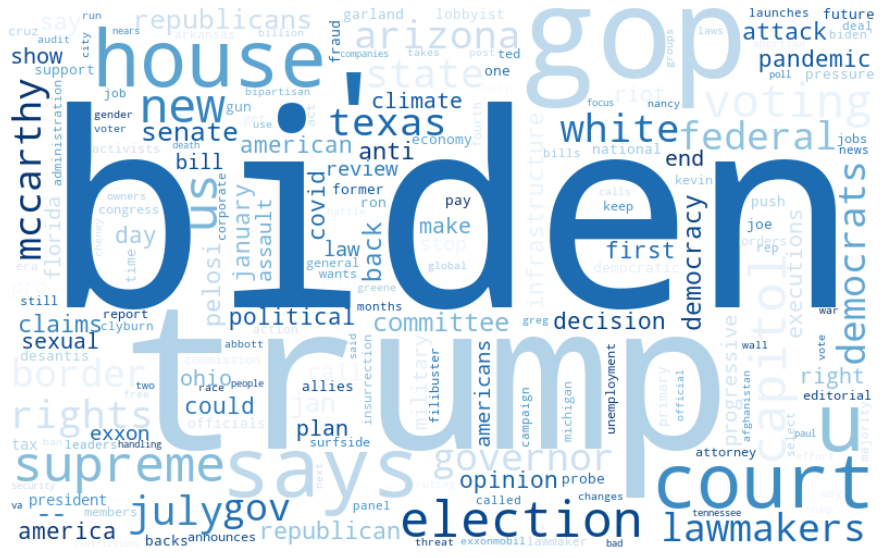

In [ ]:
#collapse
# Word cloud of top words from clean_title
herofrom.wordcloud(posts.clean_title,
                   max_words=200,
                   contour_color='', 
                   background_color='white',
                   colormap=cmaps,
                   height = 500, width=800)

### Top 25 Words From Post Titles (Bar Plot)

In [ ]:
#collapse

# create new dateframe of top words
tw = herofrom.visualization.top_words(posts['clean_title']).head(20).to_frame()
tw.reset_index(inplace=True)
tw.rename(columns={'index':'word','clean_title':'freq'},inplace=True)

#remove word less than 2 chars
tw2 = tw[tw['word'].str.len() >=2]
tw2 = tw2.sort_values(by='freq',ascending=False)
tw2.head(3)

,word,freq
0,biden,85
1,trump,67
2,gop,43


### Word Frequency of Post Titles (Bar Plot)

In [ ]:
#collapse
# Top 25 Words From Post Titles 

fig = go.Figure([go.Bar(x=tw2.word, 
                        y=tw2.freq,
                        textposition='auto')])

fig.update_layout(wtbckgnd, #set background to white
                  title={'text': f'Top 25 Words in /r/politics Post Titles ({today})',
                  'y':0.88,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  yaxis=dict(title='Word Count'))

fig.update_traces(marker_color=mcolors) #set market colors to light blue

fig.show()

### Post Scores vs Comments (Scatter Plot)

In [ ]:
#collapse
# Post Scores vs Comments 

fig = go.Figure(data=go.Scatter(x=posts.comments,
                                y=posts.score,
                                mode='markers',
                                text=posts.title))  # hover text goes here 
                              
fig.update_layout(wtbckgnd, #set background to white
                  title={'text': f"/r/politics Posts' Scores vs Comments ({today})", 
                         'y':0.88,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  xaxis_title="Post Score", yaxis_title="No. of Comments",)

fig.update_traces(marker_color=mcolors) #set market colors to light blue

fig.show()

### Post Scores by Post Counts (Histrogram Plot)

In [ ]:
#collapse
fig = px.histogram(posts, x="score")

fig.update_layout(wtbckgnd, #set background to white
                  title={'text': f'Post Scores by Post Counts',
                  'y':0.88,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  yaxis=dict(title='Post Count'),
                  xaxis=dict(title='Post Score'))

fig.update_traces(marker_color=mcolors) #set market colors to light blue

fig.show()

### Sentiment Analysis of Post Titles

Scale for determining sentiment

    positive: compound score>=0.05
    neutral: compound score between -0.05 and 0.05
    negative: compound score<=-0.05

In [ ]:
#collapse
#Sentiment Analysis of Post Titles
analyzer = SentimentIntensityAnalyzer()

posts['neg'] = posts['title'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
posts['neu'] = posts['title'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
posts['pos'] = posts['title'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
posts['compound'] = posts['title'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

posts[['title','neg','neu','pos','compound']].sample(3)

,title,neg,neu,pos,compound
392,Biden struggles to answer Russia question at p...,0.200,0.800,0.000,-0.3612
354,Child tax credit checks will start arriving th...,0.000,0.794,0.206,0.3818
271,Trump under fire for provocative email to supp...,0.147,0.675,0.178,0.1280


### Create Sentiment Column Using Compound Numbers

In [ ]:
#collapse
# sentiment col
def sentiment(compscore):
  if compscore >= 0.05:
    return 'positive'
  elif  -0.05 < compscore < 0.05: 
    return 'neutral'
  elif compscore <=-0.05:
    return 'negative'

posts['sentiment'] = posts.compound.apply(sentiment)
posts[['title','neg','neu','pos','compound','sentiment']].sample(3)

,title,neg,neu,pos,compound,sentiment
126,Op-Ed: What does it mean to be American? Ask a...,0.000,1.000,0.000,0.0000,neutral
11,Want Better Policing? Make It Easier To Fire B...,0.330,0.279,0.391,0.0258,neutral
176,They kept the wheels on democracy as Trump tri...,0.158,0.842,0.000,-0.4939,negative


### Sentiment of Post Titles (Histogram Plot)

In [ ]:
#collapse
# posts.sentiment.value_counts().to_frame().reset_index()

fig = px.histogram(posts, x="compound", color="sentiment",
                  #  color_discrete_sequence= px.colors.sequential.Blues
                   color_discrete_sequence=["#1f77b4",
                                            "#97C3E1",
                                            "#559ACA"])


fig.update_layout(wtbckgnd, #set background to white
                  title={'text': f"Sentiment of /r/politics Posts ({today})", 
                         'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  xaxis_title="Compound Score", yaxis_title="No. of Posts",)

# fig.update_traces(marker_color=mcolors) #set market colors to light blue


### Post Scores vs Compound Sentiment Score (Scatter Plot)

In [ ]:
#collapse
# Post Scores vs Compound Sentiment Score

fig = go.Figure(data=go.Scatter(x=posts.compound,
                                y=posts.score,
                                mode='markers',
                                text=posts.title))  # hover text goes here 
                              
fig.update_layout(wtbckgnd, #set background to white
                  title={'text': "/r/politics Posts' Scores vs Comments",
                         'y':0.88,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  xaxis_title="Compound Sentiment Score", 
                  yaxis_title="Scores",)

fig.update_traces(marker_color=mcolors) #set market colors to light blue

fig.show()

### Correlation of Dataframe (Heatmap)

__Note__ _*Plotly currently doesn't have simple solution for using dataframes directly with heatmaps._

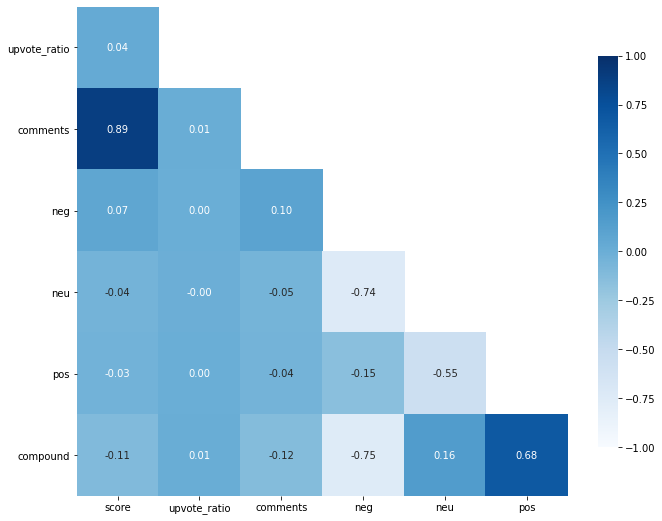

In [ ]:
#collapse
# Heatmap of Dataframe
mask = np.triu(np.ones_like(posts.corr(), dtype=np.bool))# adjust mask and df
mask = mask[1:, :-1]
corr = posts.corr().iloc[1:,:-1].copy()# plot heatmap

fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks
plt.yticks(rotation=0)
plt.show()


##Conclusion
---

__Correlation of Post Score and Number of Comments__

Heatmap run through Seaborn showed there was a very positive correlation between the number of comments and the score of a posts (0.89).

<br>

__Word Frequency of Post Titles__

Word frequency showed that presidents Biden and Trump were the most popular key words, followed by 'GOP'.

<br>

__Sentiment Analysis__

The Majority of posts in /r/politics were found be Neutral, followed by negative.


##Resources
---

1. [PRAW: The Python Reddit API Wrapper](https://praw.readthedocs.io)

2. [Ultimate Beginners Guide to Collecting Text for Natural Language Processing (NLP) with Python — Twitter, Reddit, Genius and More
Collect Text through APIs and Web Scraping](https://towardsdatascience.com/ultimate-beginners-guide-to-collecting-text-for-natural-language-processing-nlp-with-python-256d113e6184)

3. [How to scrape Reddit with Python](https://www.storybench.org/how-to-scrape-reddit-with-python/) 

4. [Try TextHero: The Absolute Simplest way to Clean and Analyze Text in Pandas](https://towardsdatascience.com/try-texthero-the-absolute-simplest-way-to-clean-and-analyze-text-in-pandas-6db86ed14272)

5. [How to Use Texthero to Prepare a Text-based Dataset for Your NLP Project](https://www.analyticsvidhya.com/blog/2020/08/how-to-use-texthero-to-prepare-a-text-based-dataset-for-your-nlp-project/)


6. [How to Run Sentiment Analysis in Python using VADER](https://python-bloggers.com/2020/10/how-to-run-sentiment-analysis-in-python-using-vader/)

7. [How to read and write configuration (.ini) file in python](https://www.codeforests.com/2020/06/14/how-to-read-ini-file-in-python/)

8. [Understanding Reddit: A beginner’s guide to the front page of the internet](https://www.dailydot.com/debug/what-is-reddit/)


## Tools Used
---

1. Pandas
2. Plotly
3. Praw (reddit api tool)
4.Texthero (NLP tool)


#hide
#### __Problems/Solutions__
1. 'created' column only showed the year 1970 when attempting to convert to datetime dtype.
 
 Solutions:
 * [Stackoverflow](https://stackoverflow.com/questions/51587468/datetime-defaulting-to-1970-in-pandas)
 * [Datetime defaulting to 1970 in pandas](https://stackoverflow.com/questions/51587468/datetime-defaulting-to-1970-in-pandas)



2. Wordcloud Image from Texthero was blurry for all sizes.

 Solutions: 
 * [My wordcloud looks ugly. Which argument to change to make it look cleaner?](https://github.com/jbesomi/texthero/issues/78)

    * [Update docstring for hero.wordcloud #102](https://github.com/jbesomi/texthero/issues/102)